## PyTorch DQN

In [1]:
from dqn import QNetwork
from dqn_agent import DQNAgent
from agent_trainer import Trainer
from memory_buffer import MemoryBuffer
import matplotlib.pyplot as plt
import gym

# make Jupyter notebook appear wider
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
env = gym.make('CartPole-v0')


def build_model(learning_rate=0.00025):
    # define Q-network
    # 4 inputs (one for each scalar observable) +1 to represent the action
    # todo: change to 4 inputs; 5 outputs to require fewer forward passes
    return QNetwork(5, 128, learning_rate)

dqn_agent = DQNAgent(network_generator=build_model, discount_rate=0.99)

trainer = Trainer(
    env=env, 
    agent=dqn_agent, 
    memory_buffer=MemoryBuffer(buffer_length=50000), 
    epsilon=1, 
    obs_normalisation=[0.686056, 0.792005, 0.075029, 0.414541]
)

trainer.run(num_episodes=500)

Trainer initialised
Episode 0 finished after 38 timesteps. 100 ep running avg 37.0. Epsilon 1.
Episode 10 finished after 18 timesteps. 100 ep running avg 20.0. Epsilon 0.9043820750088043.
Episode 20 finished after 15 timesteps. 100 ep running avg 21.0. Epsilon 0.8179069375972307.
Episode 30 finished after 21 timesteps. 100 ep running avg 19.0. Epsilon 0.7397003733882802.
Episode 40 finished after 13 timesteps. 100 ep running avg 18.0. Epsilon 0.6689717585696803.
Episode 50 finished after 14 timesteps. 100 ep running avg 17.0. Epsilon 0.6050060671375365.
Episode 60 finished after 13 timesteps. 100 ep running avg 17.0. Epsilon 0.5471566423907612.
Episode 70 finished after 10 timesteps. 100 ep running avg 16.0. Epsilon 0.49483865960020695.
Episode 80 finished after 12 timesteps. 100 ep running avg 15.0. Epsilon 0.44752321376381066.
Episode 90 finished after 11 timesteps. 100 ep running avg 15.0. Epsilon 0.4047319726783239.
Episode 100 finished after 11 timesteps. 100 ep running avg 15.0. 

In [4]:
import matplotlib.pyplot as plt

(0, 500)

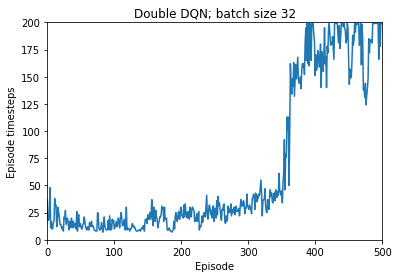

In [7]:
%matplotlib inline
fig, ax = plt.subplots()
plt.plot(trainer.episode_lengths,label='episode length')
ax.set_xlabel('Episode')
ax.set_ylabel('Episode timesteps')
ax.set_title(f'Double DQN; batch size {trainer.batch_size}')
ax.set_ylim(0, trainer.max_num_steps)
ax.set_xlim(0, len(trainer.episode_lengths))

In [12]:
%prun trainer.run(30)

Episode 0 finished after 63 timesteps. 100 ep running avg 16.0. Epsilon 0.20027702685748935.
Episode 10 finished after 11 timesteps. 100 ep running avg 15.0. Epsilon 0.18112695312597027.
Episode 20 finished after 9 timesteps. 100 ep running avg 15.0. Epsilon 0.16380796970808745.
 